In [9]:
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model
import numpy as np
import pylab as plt
#Create a Model
species = ["X"]
reactions = [(["X"], [], "massaction", {"k":"d1"}), ([], ["X"], "massaction", {"k":"k1"})]
params = [("k1", 5.0), ("d1", .1)]
M = Model(species = species, reactions = reactions, parameters = params)
M.py_initialize()

C:\Users\wp_ix\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The follow species are uninitialized and their value has defaulted to 0: X, 
  # Remove the CWD from sys.path while we load stuff.


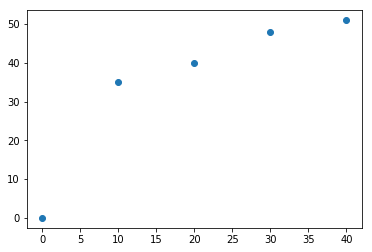

In [10]:
timepoints = np.arange(0, 50, 10.0)

R = []
N = 1
#Generate Trajectories
Data = []
for n in range(N):
    r = py_simulate_model(timepoints, Model = M, stochastic = True)
    R.append(r)
    Data.append(r["X"].to_numpy())
plt.figure()
Data = np.array(Data)
for n in range(N):
    plt.plot(R[n]['time'], Data[n], 'o')


In [11]:
#Create LogLikelihoodFunction
from bioscrape.inference import StochasticTrajectoriesLikelihood as fLL
from bioscrape.inference import StochasticTrajectories
print(fLL)
print(M)
LL = fLL(model = M, init_state = {"X":0})
Data.shape
DataObject = StochasticTrajectories(timepoints, Data, ["X"], N)
LL.set_data(DataObject)

<class 'bioscrape.inference.StochasticTrajectoriesLikelihood'>
('m', <bioscrape.types.Model object at 0x0000023CFDD78238>)


max min L 38239.0 1.0


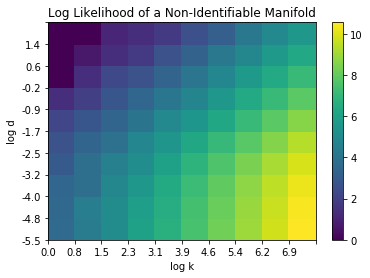

In [12]:
d_list = np.logspace(-8, 2, base = 2, num = 10)
k_list = np.logspace(0, 10, base = 2, num = 10)
HM = np.zeros((len(d_list), len(k_list)))

LL.set_likelihood_options(N_simulations = 1, norm_order = 1)

for di in range(len(d_list)):
    for ki in range(len(k_list)):
        LL.set_init_params({"d1":d_list[di], "k1":k_list[ki]})
        v = LL.py_log_likelihood()
        HM[di, ki] = -v

print("max min L", np.max(HM), np.min(HM))
plt.figure()
plt.title("Log Likelihood of a Non-Identifiable Manifold")
plt.xlabel("log k")
plt.xticks(range(20), [round(np.log(k), 1) for k in k_list])
plt.ylabel("log d")
plt.yticks(range(20), [round(np.log(d), 1) for d in d_list])
cb = plt.pcolor(np.log(HM))
plt.colorbar(cb)